# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
!pip install citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | fannuj
City not found. Skipping...
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | salym
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | afaahiti
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | bucerias
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | tchintabaraden
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | cide
Processing Record 20 of Set 1 | constantia
Processing Record 21 of Set 1 | isafjordur
Processing Record 22

In [51]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [54]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,22.28,72,100,3.87,BR,1730084707
1,port-aux-francais,-49.3500,70.2167,2.80,75,98,14.16,TF,1730084986
2,pisco,-13.7000,-76.2167,17.23,88,20,4.12,PE,1730084987
3,petropavlovsk-kamchatsky,53.0452,158.6483,3.33,45,75,3.00,RU,1730084988
4,lebu,-37.6167,-73.6500,9.55,94,1,7.27,CL,1730084855


In [55]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/jt/Data Analytics/python-api-challenge/python-api-challenge/WeatherPy/output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("/Users/jt/Data Analytics/python-api-challenge/python-api-challenge/WeatherPy/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,22.28,72,100,3.87,BR,1730084707
1,port-aux-francais,-49.3500,70.2167,2.80,75,98,14.16,TF,1730084986
2,pisco,-13.7000,-76.2167,17.23,88,20,4.12,PE,1730084987
3,petropavlovsk-kamchatsky,53.0452,158.6483,3.33,45,75,3.00,RU,1730084988
4,lebu,-37.6167,-73.6500,9.55,94,1,7.27,CL,1730084855


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

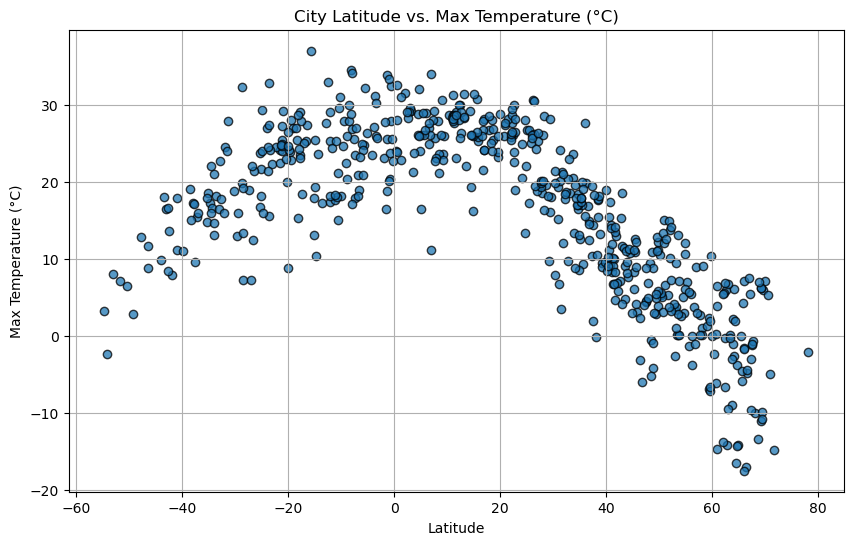

In [61]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

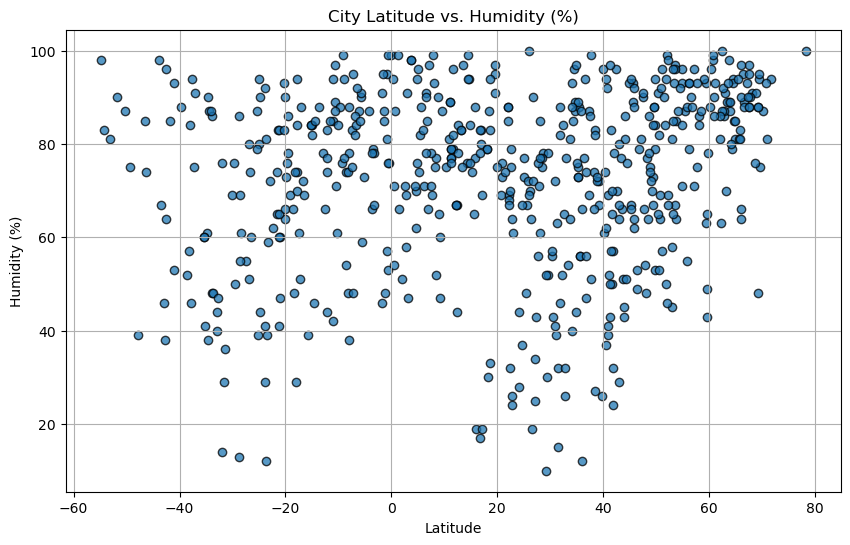

In [62]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

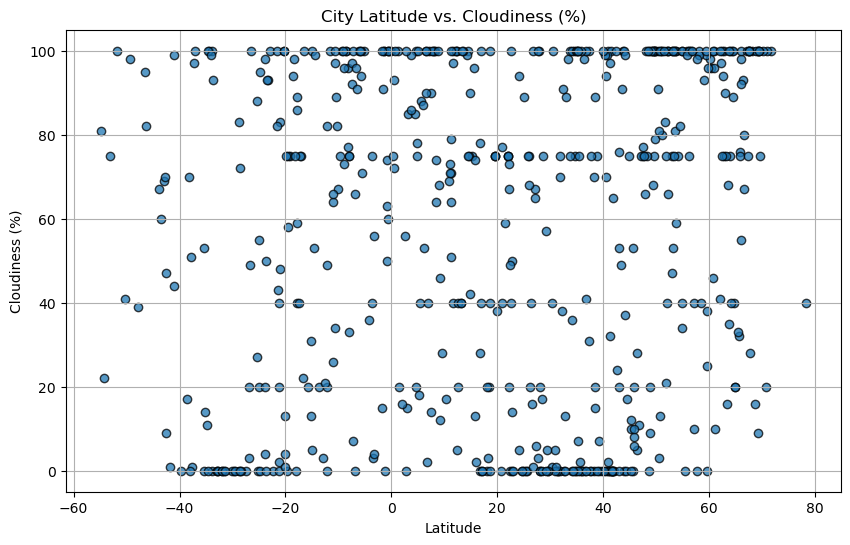

In [63]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

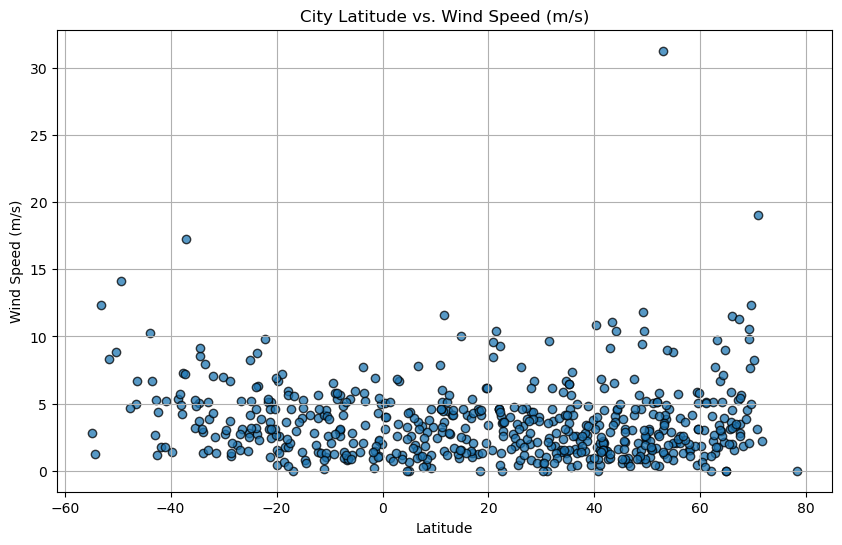

In [64]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.75)
    
    regression_line = slope * np.array(x_values) + intercept
    plt.plot(x_values, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")

    plt.text(min(x_values) + 1, max(y_values) - 5, f"R² = {r_value**2:.2f}", color="red", fontsize=12)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()

    plt.savefig(save_path)
    
    plt.show()

    print(f"R-squared: {r_value**2:.4f}")

In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,petropavlovsk-kamchatsky,53.0452,158.6483,3.33,45,75,3.00,RU,1730084988
5,kodiak,57.7900,-152.4072,2.73,75,0,1.54,US,1730084990
6,salym,60.0625,71.4789,-0.05,88,98,1.84,RU,1730084992
9,hawaiian paradise park,19.5933,-154.9731,23.26,97,75,2.06,US,1730084995
10,bucerias,20.7500,-105.3333,25.99,69,0,1.54,MX,1730084996


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,22.28,72,100,3.87,BR,1730084707
1,port-aux-francais,-49.3500,70.2167,2.80,75,98,14.16,TF,1730084986
2,pisco,-13.7000,-76.2167,17.23,88,20,4.12,PE,1730084987
4,lebu,-37.6167,-73.6500,9.55,94,1,7.27,CL,1730084855
7,puerto natales,-51.7236,-72.4875,7.05,90,100,8.35,CL,1730084993


###  Temperature vs. Latitude Linear Regression Plot

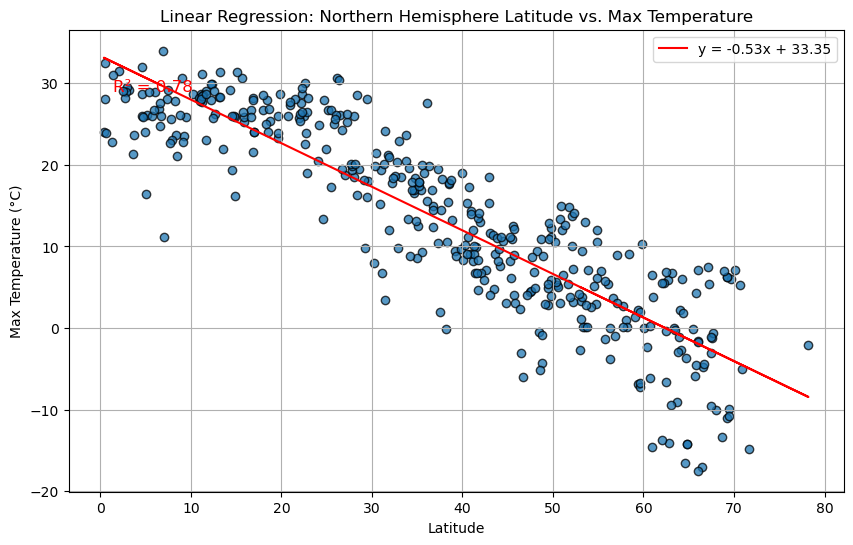

R-squared: 0.7834


In [68]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Latitude", "Max Temperature (°C)", 
                       "Linear Regression: Northern Hemisphere Latitude vs. Max Temperature",
                       "output_data/NH_Lat_vs_Temperature_LinearReg.png")

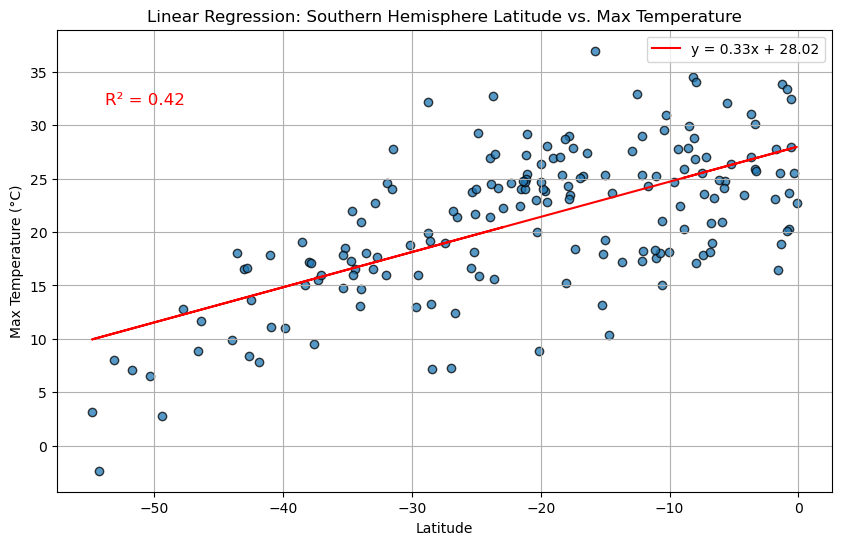

R-squared: 0.4205


In [70]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                                    "Latitude", "Max Temperature (°C)", 
                                    "Linear Regression: Southern Hemisphere Latitude vs. Max Temperature",
                                    "output_data/SH_Lat_vs_Temperature_LinearReg.png")

**Discussion about the linear relationship:** 

Northern Hemisphere: The linear regression analysis of latitude vs temperature shows a negative correlation. As latitude increases (moving from the equator towards the poles), the temperature generally decreases. This relates to Earth's geography, where regions closer to the poles receive less direct sunlight, leading to cooler temperatures.

Southern Hemisphere: The linear regression of latitude vs temperature also displays a negative correlation, but the slope and R² value may differ slightly from the Northern Hemisphere due to the distribution of landmasses and ocean. Like in the Northern Hemisphere, temperatures decrease as you move further from the equator towards higher latitudes (closer to the South Pole).

### Humidity vs. Latitude Linear Regression Plot

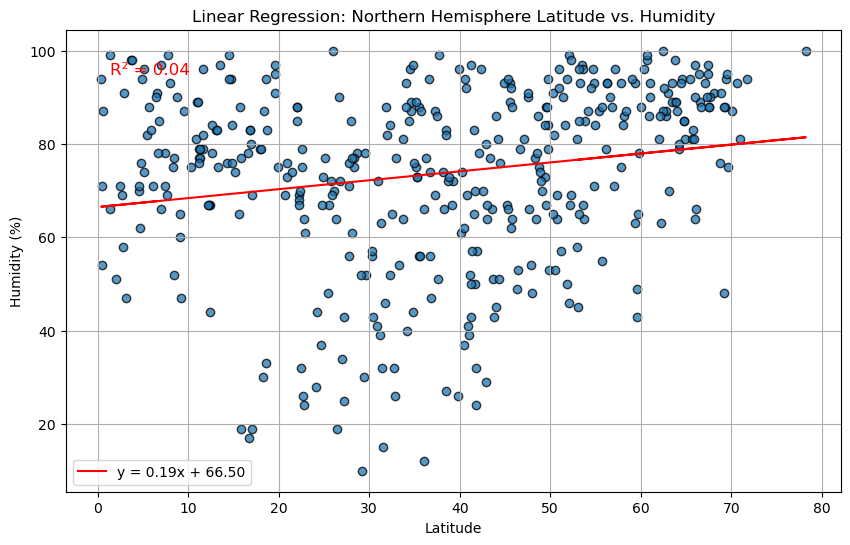

R-squared: 0.0370


In [71]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Latitude", "Humidity (%)", 
                       "Linear Regression: Northern Hemisphere Latitude vs. Humidity",
                       "output_data/NH_Lat_vs_Humidity_LinearReg.png")

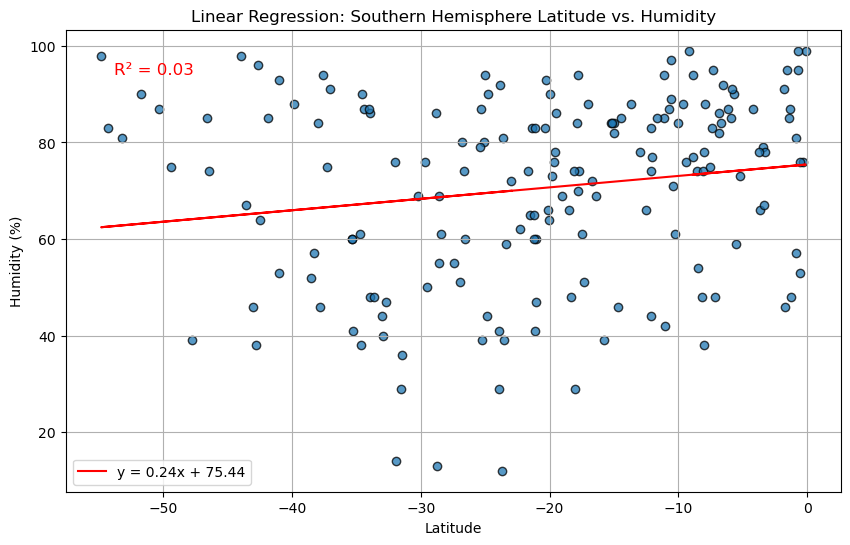

R-squared: 0.0274


In [73]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                                    "Latitude", "Humidity (%)", 
                                    "Linear Regression: Southern Hemisphere Latitude vs. Humidity",
                                    "output_data/SH_Lat_vs_Humidity_LinearReg.png")

**Discussion about the linear relationship:**

Northern Hemisphere: Humidity levels in the Northern Hemisphere appear to be fairly spread out across different latitudes, suggesting that other factors (such as distance to bodies of water, climate zones, and altitude) may play larger roles in determining humidity levels than latitude alone.

Southern Hemisphere: Just like in the Northern Hemisphere, the variation in humidity across different latitudes in the Southern Hemisphere is not significant. Humidity shows to be influenced by other regional factors rather than latitude alone.

### Cloudiness vs. Latitude Linear Regression Plot

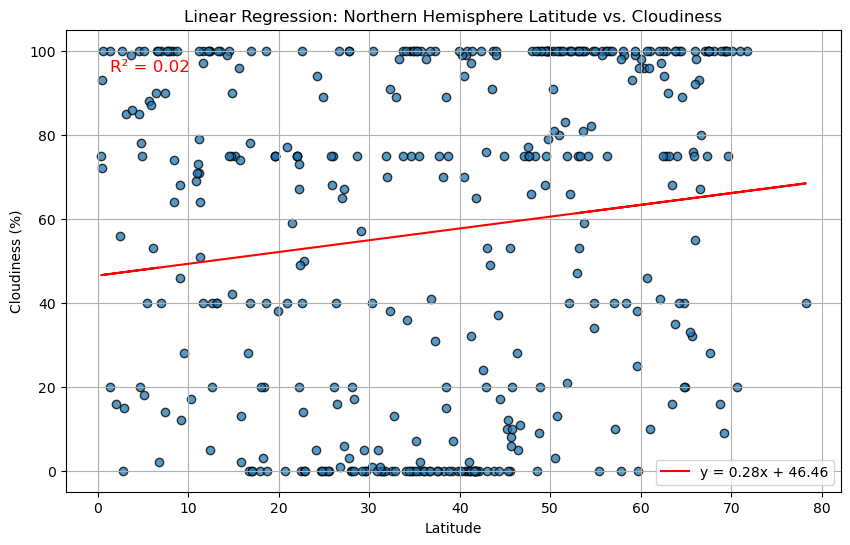

R-squared: 0.0193


In [74]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness (%)", 
                       "Linear Regression: Northern Hemisphere Latitude vs. Cloudiness",
                       "output_data/NH_Lat_vs_Cloudiness_LinearReg.png")

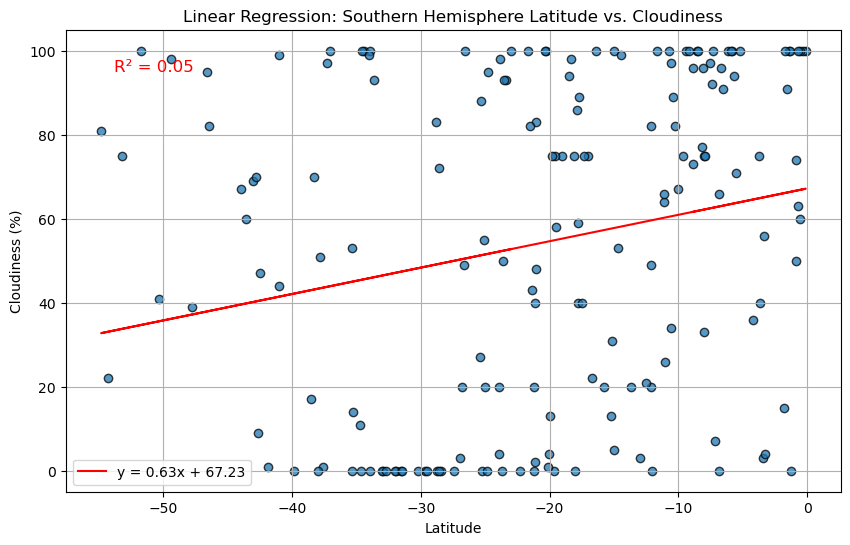

R-squared: 0.0486


In [76]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                                    "Latitude", "Cloudiness (%)", 
                                    "Linear Regression: Southern Hemisphere Latitude vs. Cloudiness",
                                    "output_data/SH_Lat_vs_Cloudiness_LinearReg.png")

**Discussion about the linear relationship:**

Northern Hemisphere: In the Northern Hemisphere, the linear regression analysis between latitude and cloudiness shows that there is no significant linear relationship between these two variables. The scatter plot shows that cloudiness is quite variable across different latitudes, with no clear trend of increasing or decreasing cloudiness as you move from the equator toward the poles. The R2 value, which indicates the proportion of variance explained by the regression model, is very low, suggesting that latitude does not strongly predict cloudiness in the Northern Hemisphere.

Southern Hemisphere: Similarly, in the Southern Hemisphere, the linear regression between latitude and cloudiness also reveals no substantial linear relationship. The data points are widely scattered, and cloudiness does not show any consistent pattern with changes in latitude. The R2 value is also low, further confirming that latitude is not a strong predictor of cloudiness in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

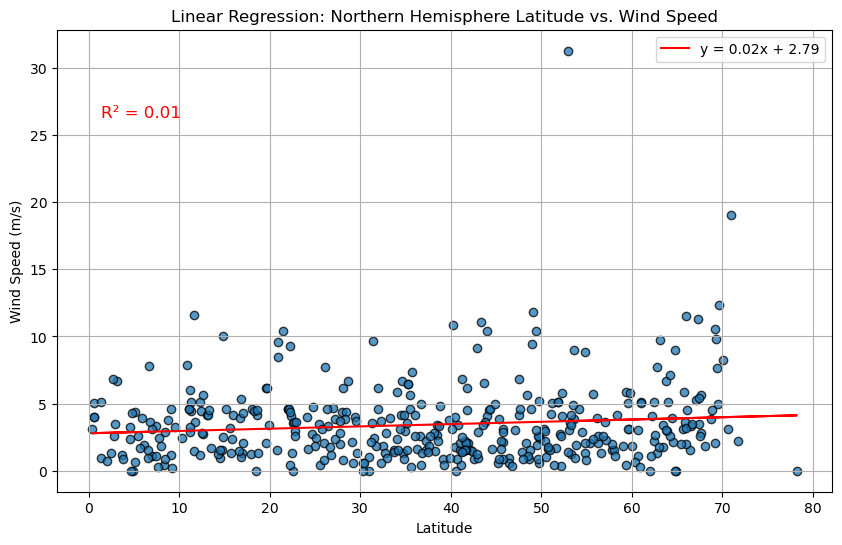

R-squared: 0.0130


In [77]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Latitude", "Wind Speed (m/s)", 
                       "Linear Regression: Northern Hemisphere Latitude vs. Wind Speed",
                       "output_data/NH_Lat_vs_WindSpeed_LinearReg.png")

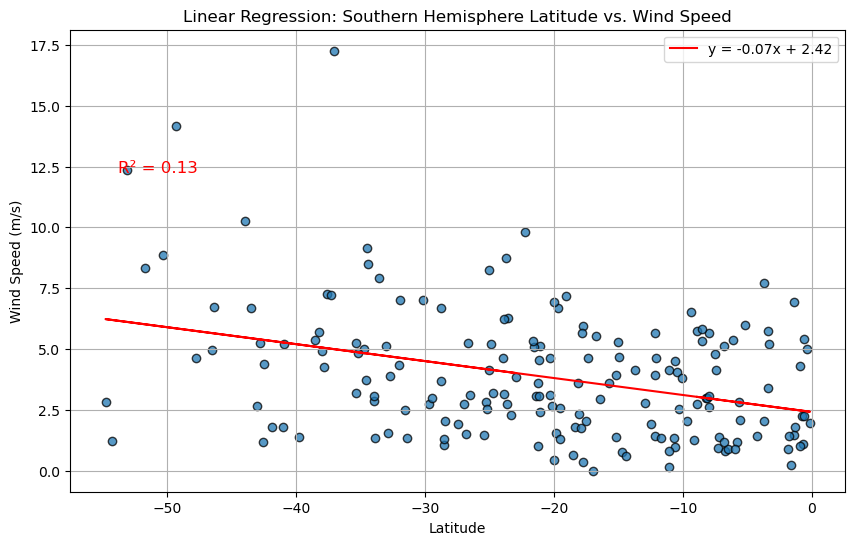

R-squared: 0.1280


In [79]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                                    "Latitude", "Wind Speed (m/s)", 
                                    "Linear Regression: Southern Hemisphere Latitude vs. Wind Speed",
                                    "output_data/SH_Lat_vs_WindSpeed_LinearReg.png")

**Discussion about the linear relationship:**

Northern Hemisphere: The slope of the regression line is small (close to zero), indicating a very weak relationship between latitude and wind speed. The R2 value is very low, meaning that the latitude does not strongly explain the variation in wind speed. This suggests that wind speeds in the Northern Hemisphere are not significantly affected by the latitude, and other factors (local weather conditions, geographical features, or seasonal changes) are more important determinants of wind speed. The near-zero slope and low R2 tell us that wind speed in the Northern Hemisphere remains consistent across different latitudes, with no strong increasing or decreasing trend from the equator to the poles.

Southern Hemisphere: The slope is again small, showing a weak linear relationship between latitude and wind speed in the Southern Hemisphere. Like in the Northern Hemisphere, the R2 value is very low, indicating that latitude is not a significant factor in determining wind speed in the Southern Hemisphere either. This result suggests that wind speeds do not increase or decrease in a clear, linear fashion with latitude in the Southern Hemisphere. Other factors, such as ocean currents, distance to coastlines, and atmospheric pressure systems, may play a larger role in influencing wind speed.